In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from __future__ import division
from datetime import datetime, timedelta, date
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA

In [ ]:
!pip install chart_studio

In [ ]:
from chart_studio.plotly import plot, iplot as pylab
import plotly.offline as pyoff
import plotly.graph_objs as go

# Data preprocessing 

In [ ]:
df = pd.read_csv('sales_data.csv', encoding="unicode_escape")

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
data = pd.DataFrame(df)
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
print('Order date description\n')
print(data['ORDERDATE'].describe(datetime_is_numeric = True))


Order date description

count                             2823
mean     2004-05-11 00:16:49.989379200
min                2003-01-06 00:00:00
25%                2003-11-06 12:00:00
50%                2004-06-15 00:00:00
75%                2004-11-17 12:00:00
max                2005-05-31 00:00:00
Name: ORDERDATE, dtype: object


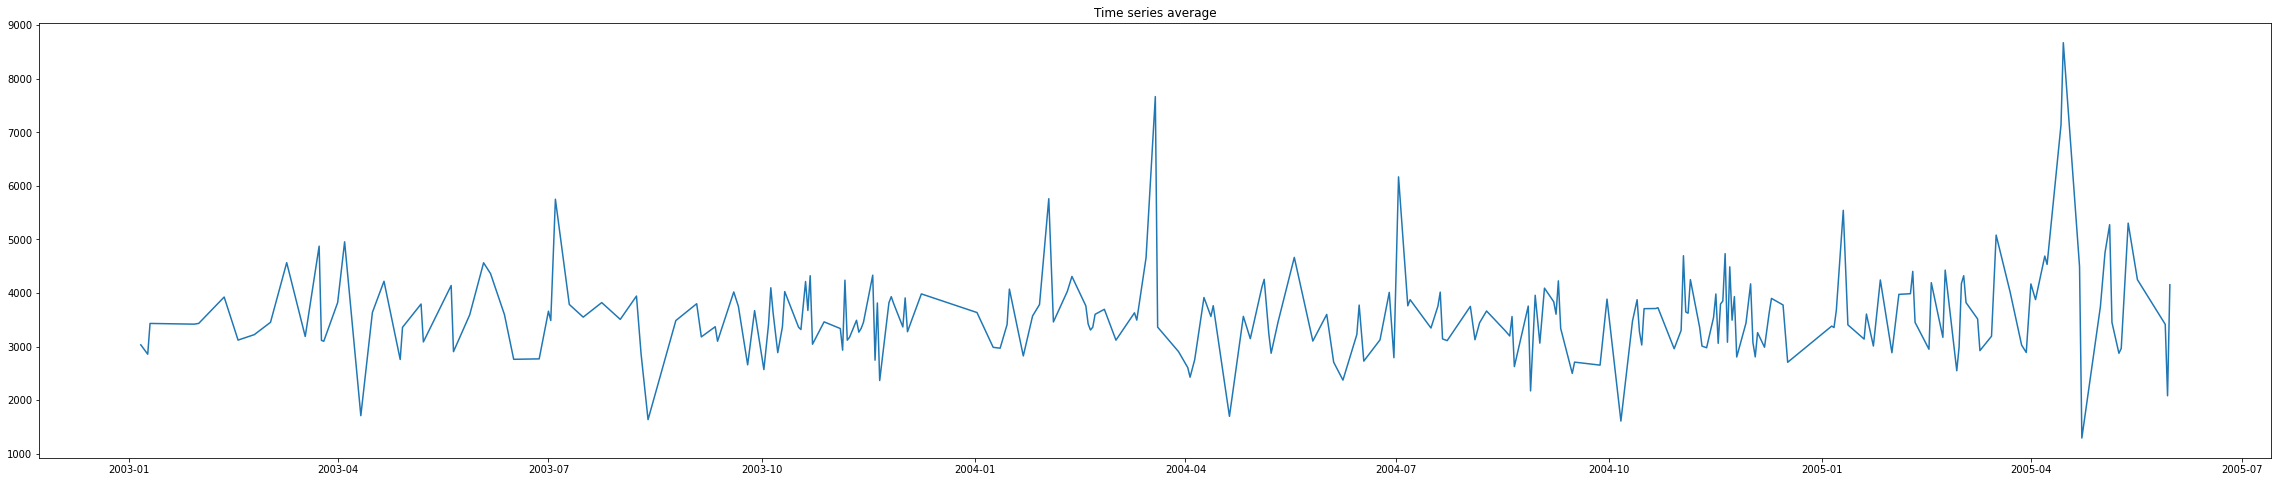

In [ ]:
plt.figure(figsize=(40, 8))
mean_group = data.groupby(["ORDERDATE"])["SALES"].mean()
plt.plot(mean_group)
plt.title("Time series average")
plt.show()

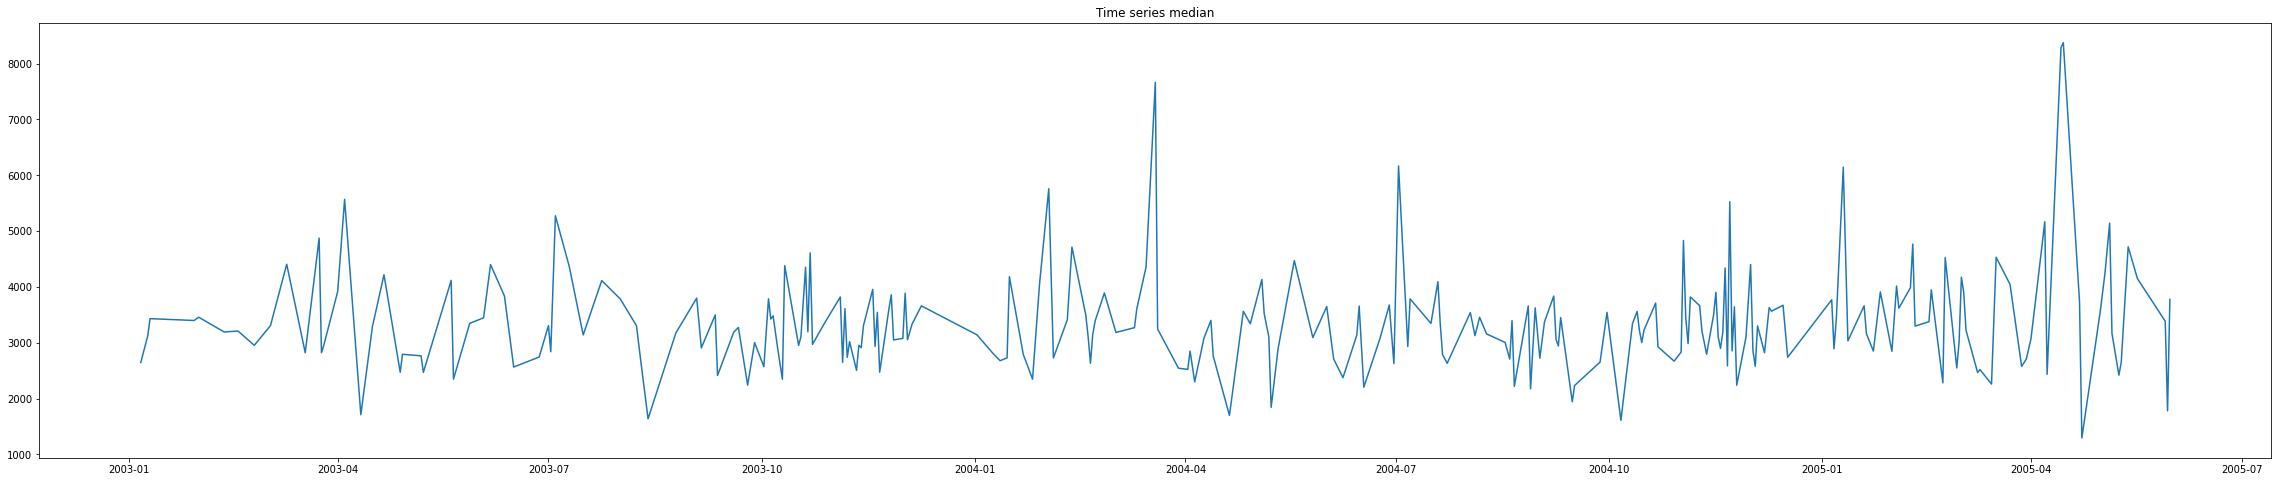

In [ ]:
plt.figure(figsize=(40, 8))
mean_group = data.groupby(["ORDERDATE"])["SALES"].median()
plt.plot(mean_group)
plt.title("Time series median")
plt.show()

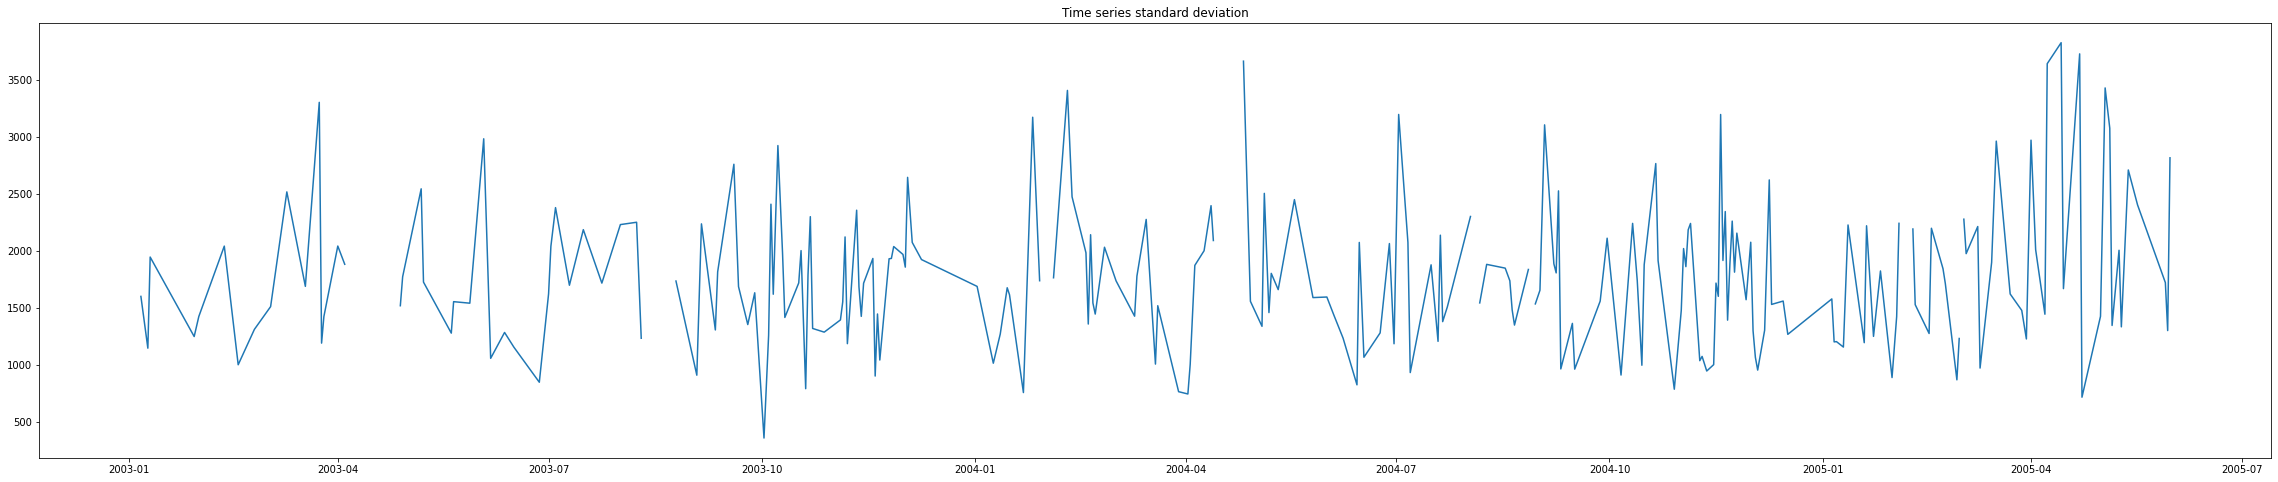

In [ ]:
plt.figure(figsize=(40, 8))
mean_group = data.groupby(["ORDERDATE"])["SALES"].std()
plt.plot(mean_group)
plt.title("Time series standard deviation")
plt.show()

Autoregression Model AR

In [ ]:
forcast = data[["ORDERDATE", "SALES"]]
forcast = forcast.sort_values("ORDERDATE").reset_index() #,inplace = True, ascending=True)
#data.set_index(['ORDERDATE'], inplace = True)
#forcast = pd.DataFrame(data['SALES'])
forcast = forcast.drop("index", axis = True)
forcast["ORDERDATE"] = forcast["ORDERDATE"].astype("datetime64[ns]")
forcast.head()

,ORDERDATE,SALES
0,2003-01-06,5151.00
1,2003-01-06,3390.00
2,2003-01-06,1903.22
3,2003-01-06,1689.03
4,2003-01-09,1404.00


In [ ]:
# Represent month in date field a ots forst day

df.ORDERDATE = pd.to_datetime(df.ORDERDATE, errors='coerce')
df.ORDERDATE = df.ORDERDATE.dt.year.astype('str') + '-' + df.ORDERDATE.dt.month.astype('str')  + '-01'


# groupby date and sum the sales

df = df.groupby('ORDERDATE').SALES.sum().reset_index()
df.head()

,ORDERDATE,SALES
0,2003-1-01,129753.60
1,2003-10-01,568290.97
2,2003-11-01,1029837.66
3,2003-12-01,261876.46
4,2003-2-01,140836.19


In [ ]:
forcast["ORDERDATE"].min(), forcast["ORDERDATE"].max()

(Timestamp('2003-01-06 00:00:00'), Timestamp('2005-05-31 00:00:00'))

In [ ]:
forcast.index

RangeIndex(start=0, stop=2823, step=1)

Syntax
class statsmodels.tsa.ar_model.AR(endog, dates=None, freq=None, missing='none')[source] Autoregressive AR(p) model
Parameters: endog (array-like) – 1-d endogenous response variable. The independent variable.

dates (array-like of datetime, optional) – An array-like object of datetime objects. If a pandas object is given for endog or exog, it is assumed to have a DateIndex.

freq (str, optional) – The frequency of the time-series. A Pandas offset or ‘B’, ‘D’, ‘W’, ‘M’, ‘A’, or ‘Q’. This is optional if dates are given.

missing (str) – Available options are ‘none’, ‘drop’, and ‘raise’. If ‘none’, no nan checking is done. If ‘drop’, any observations with nans are dropped. If ‘raise’, an error is raised. Default is ‘none.’

In [ ]:
leng = len(forcast['ORDERDATE'])
leng

2823

In [ ]:
forcast.set_index('ORDERDATE', inplace = True)
forcast.tail()

,SALES
ORDERDATE,
2005-05-31,1895.94
2005-05-31,4692.60
2005-05-31,5894.94
2005-05-31,2702.04
2005-05-31,3777.58


In [ ]:
forcast.index

DatetimeIndex(['2003-01-06', '2003-01-06', '2003-01-06', '2003-01-06',
               '2003-01-09', '2003-01-09', '2003-01-09', '2003-01-09',
               '2003-01-10', '2003-01-10',
               ...
               '2005-05-31', '2005-05-31', '2005-05-31', '2005-05-31',
               '2005-05-31', '2005-05-31', '2005-05-31', '2005-05-31',
               '2005-05-31', '2005-05-31'],
              dtype='datetime64[ns]', name='ORDERDATE', length=2823, freq=None)

In [ ]:
model = AR(forcast)
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
## do thee prediction
y_pred = model_fit.predict(start = 2800, end= 2823)
y_pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



2800    3474.064735
2801    3646.485128
2802    3332.431412
2803    3333.972648
2804    3377.303392
2805    3411.169058
2806    3438.047632
2807    3275.630918
2808    3483.046251
2809    3881.317008
2810    3590.859622
2811    3957.627932
2812    3521.855539
2813    4122.463756
2814    3402.109645
2815    3942.331626
2816    3656.852271
2817    3722.518569
2818    3664.442390
2819    3765.776981
2820    3831.190320
2821    3433.158461
2822    3502.741978
2823    3350.614073
dtype: float64

In [ ]:
## is the same as the above code
y_pred.columns = ["SALES"]
y_pred.head()

2800    3474.064735
2801    3646.485128
2802    3332.431412
2803    3333.972648
2804    3377.303392
dtype: float64

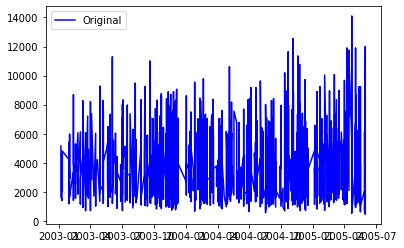

In [ ]:
plt.plot(forcast, color='blue', label='Original')
plt.legend(loc='best')
plt.show(block=False)

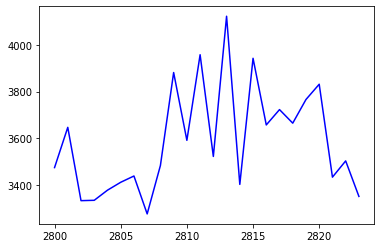

In [ ]:
plt.plot(y_pred, color = "blue", label = "predicted")
plt.show()

Moving Average (MA)

In [ ]:
model_2 = ARMA(forcast["SALES"], order = (2, 1))
model_fit2 = model_2.fit(disp = False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



In [ ]:
y_pred2 = model_fit2.predict(start = 2800, end = 2823)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



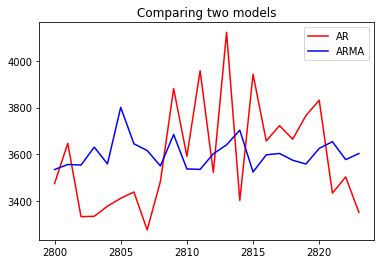

In [ ]:
#plt.plot(test_forcast, color='blue', label='Original')
plt.plot(y_pred, color='red', label='AR')
plt.plot(y_pred2, color='blue', label='ARMA')
plt.legend(loc='best')
plt.title('Comparing two models')
plt.show(block=False)

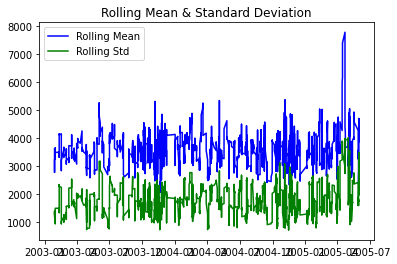

In [ ]:
mvg_avg = forcast.rolling(window = 12). mean()
mvg_std = forcast.rolling(window = 12). std()
mean = plt.plot(mvg_avg, color='blue', label='Rolling Mean')
std = plt.plot(mvg_std, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Chek for stationarity 

 For it we are going to use the Augmented Dicky Fuller test (ADF)

What is stationary
Stationarity’ is one of the most important concepts you will come across when working with time series data. A stationary series is one in which the properties – mean, variance and covariance, do not vary with time.
In time-series analysis we must check whether the data follow any treand, seanality, or residual effects or not, and if there is any such effect then our first step is to remove them. Augmented Dickey-Fuller(ADF) statistics is one of the most popular statistics technique to check where the data is stationary or non-stationary. It uses a autoregressive model optimize and optimizes an information criteria across multiple different lag value. The Hypotesis in this case is that the time series can be represented by a unit root, that is non stationary(has some time dependent structure). The alternative hypothesis is that the time series is stationary.

In [ ]:
new_data = forcast['SALES'].resample('MS').mean()
forcast["2003":].head()

,SALES
ORDERDATE,
2003-01-06,5151.00
2003-01-06,3390.00
2003-01-06,1903.22
2003-01-06,1689.03
2003-01-09,1404.00


In [ ]:
from statsmodels.tsa.stattools import adfuller

ADF = adfuller(forcast.SALES.values, autolag='AIC')
print('Results of the Dicky Fuller test')
output = pd.Series(ADF[0:4], index = ['ADF statitc', 'p-value', 'Lag used', 'Number of observation used'])

for key, value in ADF[4].items():
  output['Critical value (%s)' %key] = value

print(output)
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/

Results of the Dicky Fuller test
ADF statitc                    -51.921606
p-value                          0.000000
Lag used                         0.000000
Number of observation used    2822.000000
Critical value (1%)             -3.432669
Critical value (5%)             -2.862565
Critical value (10%)            -2.567315
dtype: float64


For a Time series to be stationary, its ADCF test should have:

p-value to be low (according to the null hypothesis)

The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics From the above ADCF test result, we see that p-value(at max can be.0) is very negligible. Also critical values are very close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is stationary

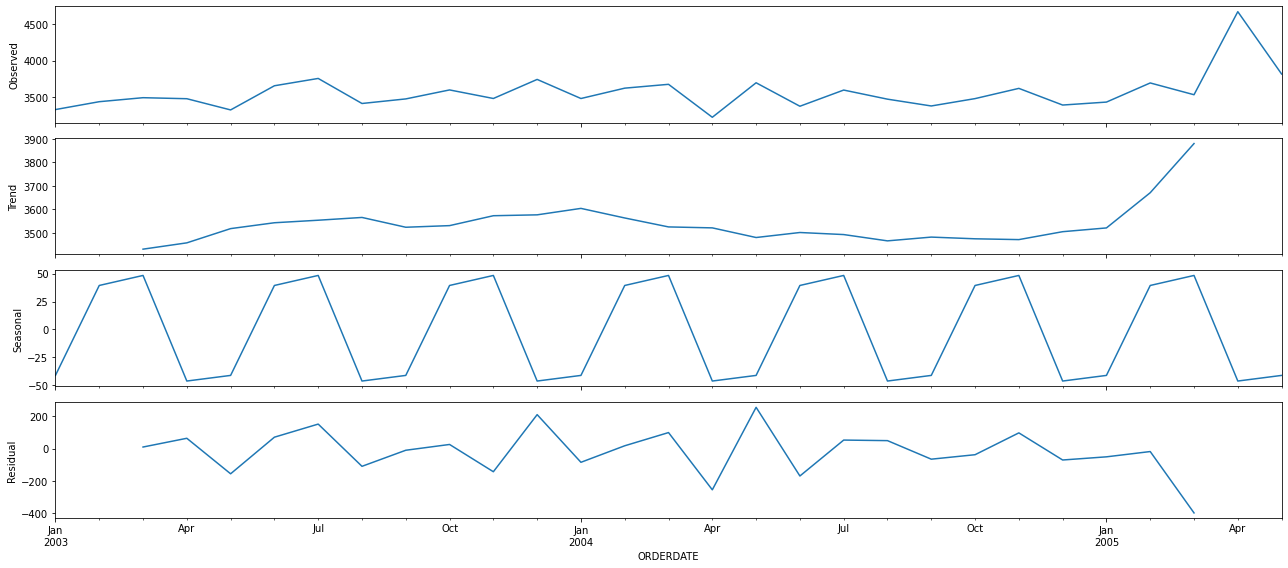

In [ ]:
from pylab import rcParams
import matplotlib.ticker as ticker
import plotly.express as px
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(new_data, model = 'aditive',freq=4 )

fig = decomposition.plot()
plt.show()

 # https://www.roelpeters.be/decomposition-of-time-series-with-pandas-and-statsmodels/

# Traditional time series models

## ARIMA

As the data follows some seasonality issue, so we need to remove those patterns using transformation and seasonal differentiation

In [ ]:
# Transformation
forcast['SALES_Log'] = np.log(forcast['SALES'])
#forcast["log_difference"] = forcast["SALES_Log"] - forcast["SALES_Log"].shift(1)
forcast_diff = forcast["SALES_Log"]
#forcast["log_difference"].dropna().plot()

Seasonal differentiation In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:

yt‘ = yt – y(t-n)

n=7

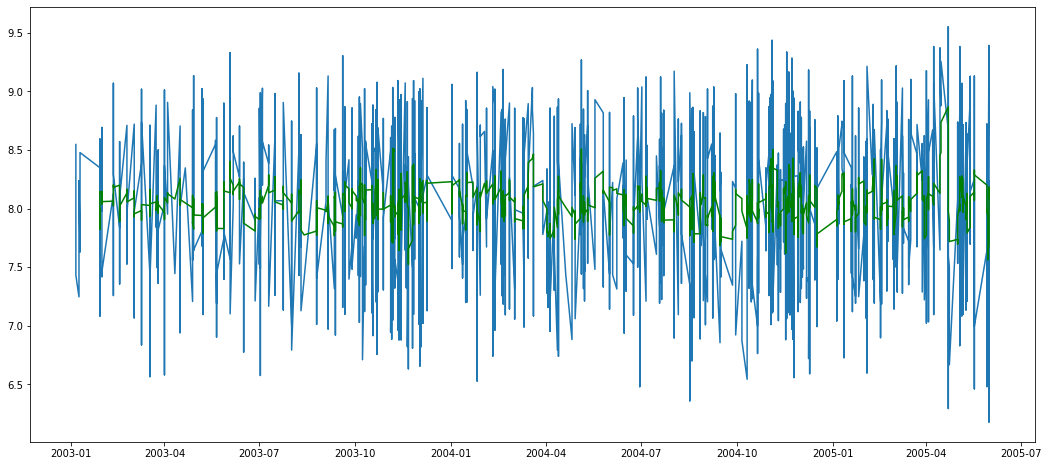

In [ ]:
moving_avg = forcast_diff.rolling(12).mean()
plt.plot(forcast_diff)
plt.plot(moving_avg, color='green')


Time Series Forcasting : ARIMA Model ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p) AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results. An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4. The ACF and PACF plots for the TS after differencing can be plotted as:

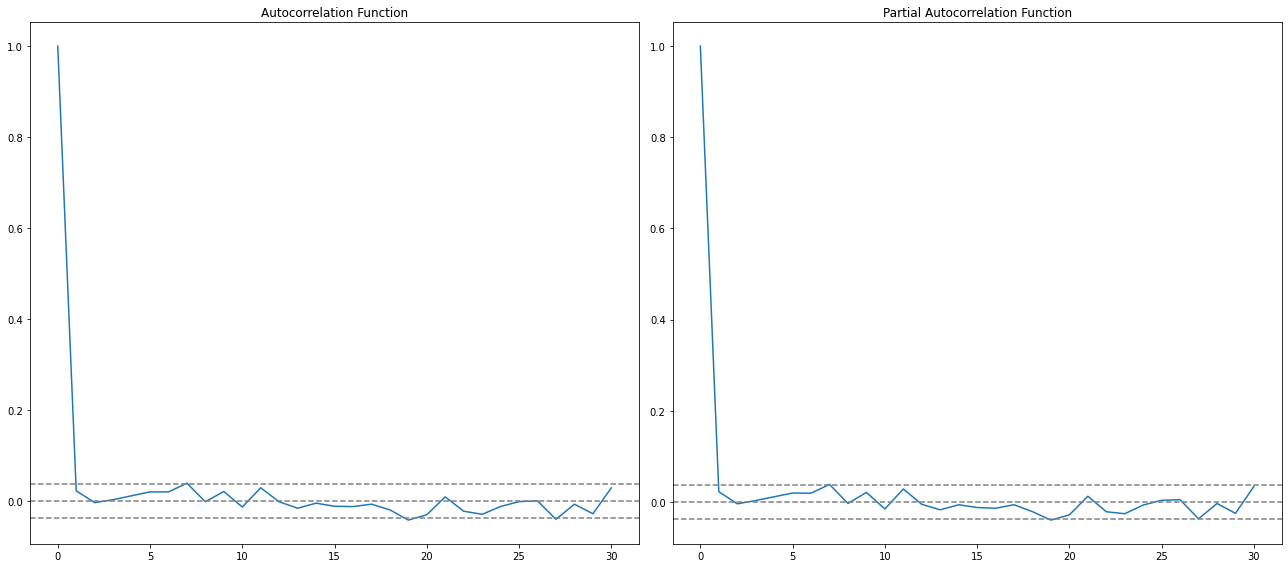

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(forcast["SALES"], nlags=30)
lag_pacf = pacf(forcast["SALES"], nlags=30, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y = 0,linestyle='--',color='gray')
plt.axhline(y = -1.96/np.sqrt(len(forcast["SALES"])),linestyle='--',color='gray')
plt.axhline(y = 1.96/np.sqrt(len(forcast["SALES"])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle='--', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(forcast["SALES"])), linestyle='--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(forcast["SALES"])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            


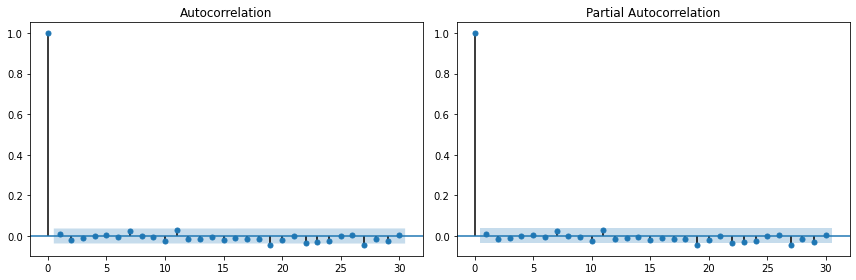

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(forcast_diff, lags=30, ax=axes[0])
plot_pacf(forcast_diff, lags=30, ax=axes[1])
plt.tight_layout()

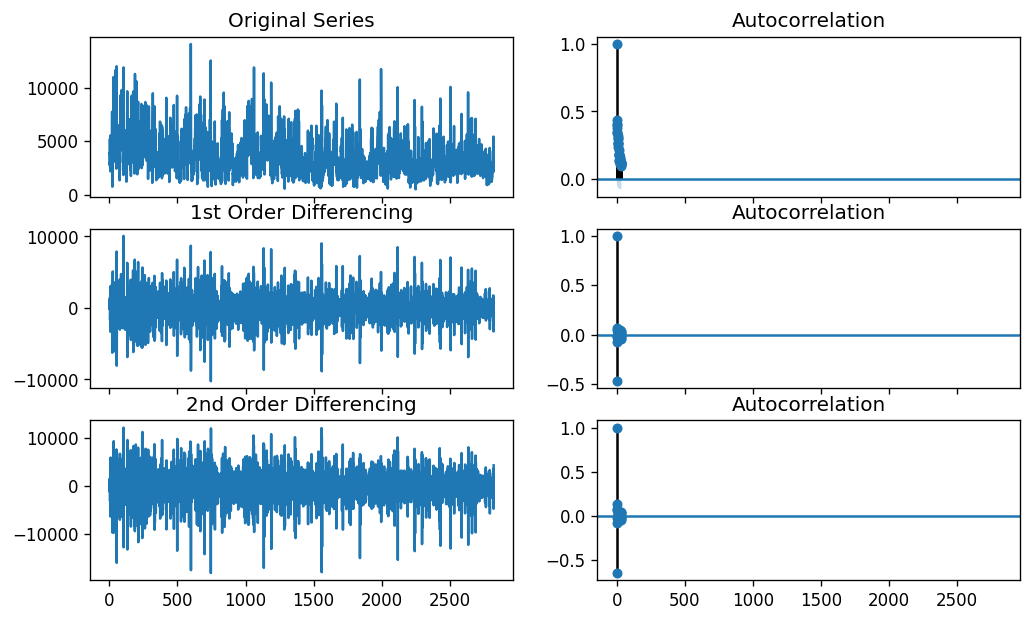

In [ ]:
# Original Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(10, 6), 'figure.dpi': 120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.SALES); axes[0, 0].set_title('Original Series')
plot_acf(data.SALES, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.SALES.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.SALES.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.SALES.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.SALES.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

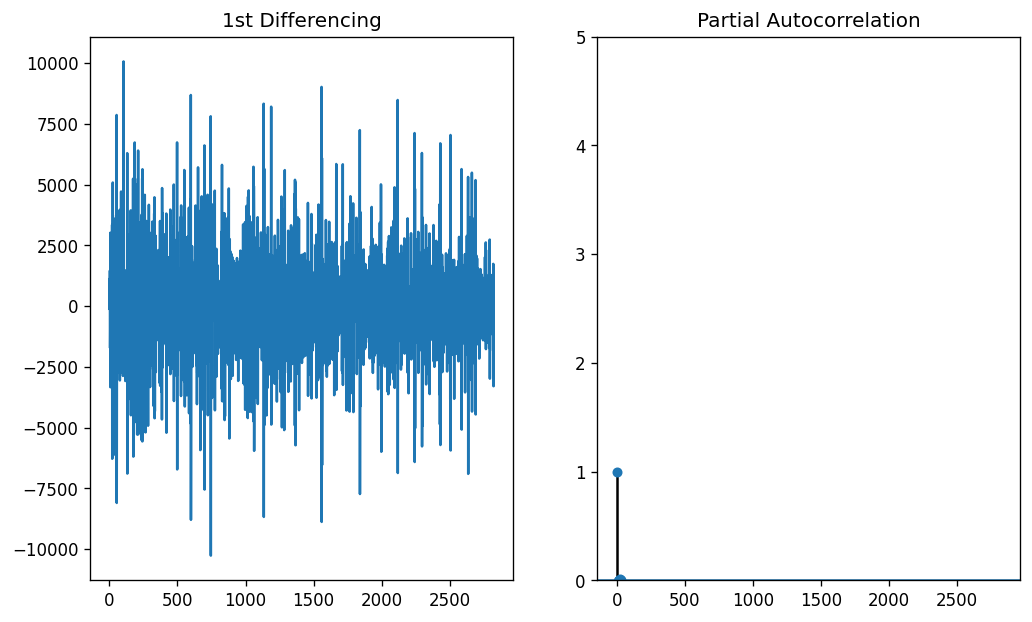

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(10, 6), 'figure.dpi': 120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.SALES.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.SALES.diff().dropna(), ax=axes[1])

plt.show()

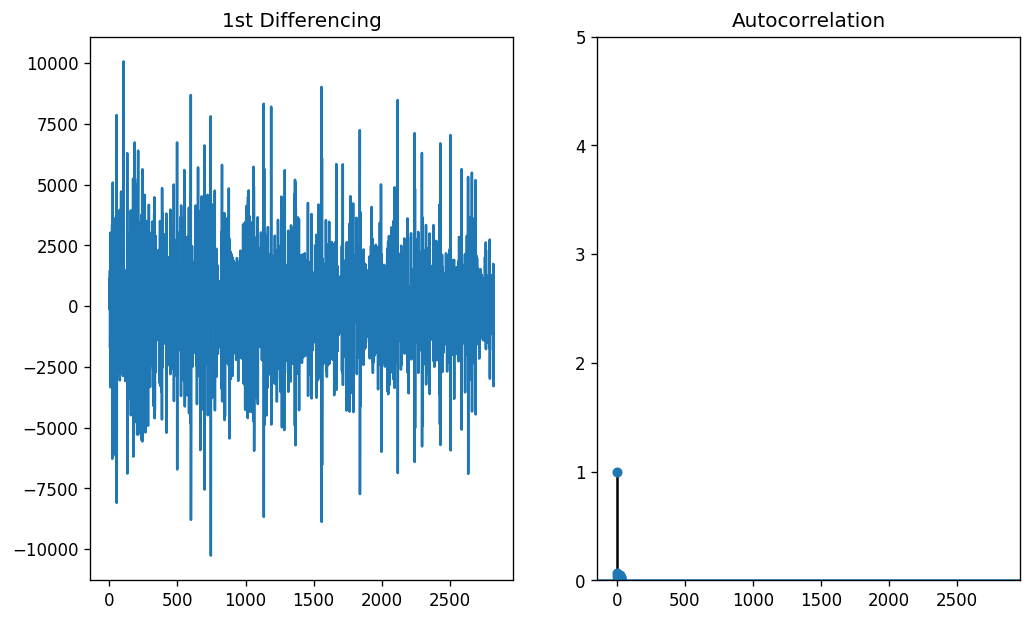

In [ ]:
plt.rcParams.update({'figure.figsize':(10, 6), 'figure.dpi': 120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.SALES.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_acf(data.SALES.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2 From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.



In [ ]:
## 1,1,2 ARIME Model

model = ARIMA(forcast.SALES, order=(2,1,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.SALES   No. Observations:                 2822
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -25621.201
Method:                       css-mle   S.D. of innovations           2121.896
Date:                Sun, 23 Jan 2022   AIC                          51250.402
Time:                        15:33:37   BIC                          51274.183
Sample:                             1   HQIC                         51258.982
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0688     20.176     -0.003      0.997     -39.614      39.476
ar.L1.D.SALES    -0.6481      0.018    -36.498      0.000      -0.683      -0.613
ar.L2.D.SALES    -0.3321      0.018    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
# 0,2,1 ARIMA Model 
model = ARIMA(forcast.SALES, order=(0,2,1))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:               D2.SALES   No. Observations:                 2821
Model:                 ARIMA(0, 2, 1)   Log Likelihood              -26162.275
Method:                       css-mle   S.D. of innovations           2575.486
Date:                Sun, 23 Jan 2022   AIC                          52330.549
Time:                        15:33:41   BIC                          52348.384
Sample:                             2   HQIC                         52336.984
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0014      0.060      0.023      0.982      -0.115       0.118
ma.L1.D2.SALES    -0.9999      0.001  -1148.681      0.000      -1.002      -0.998
                                    

In [ ]:
# 2,1,2 ARIMA Model

model = ARIMA(forcast.SALES, order=(2,1,2))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.SALES   No. Observations:                 2822
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -25221.428
Method:                       css-mle   S.D. of innovations           1839.207
Date:                Sun, 23 Jan 2022   AIC                          50454.856
Time:                        15:33:48   BIC                          50490.527
Sample:                             1   HQIC                         50467.727
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0815      0.043      1.881      0.060      -0.003       0.166
ar.L1.D.SALES    -0.9656      0.021    -45.481      0.000      -1.007      -0.924
ar.L2.D.SALES     0.0161      0.019     

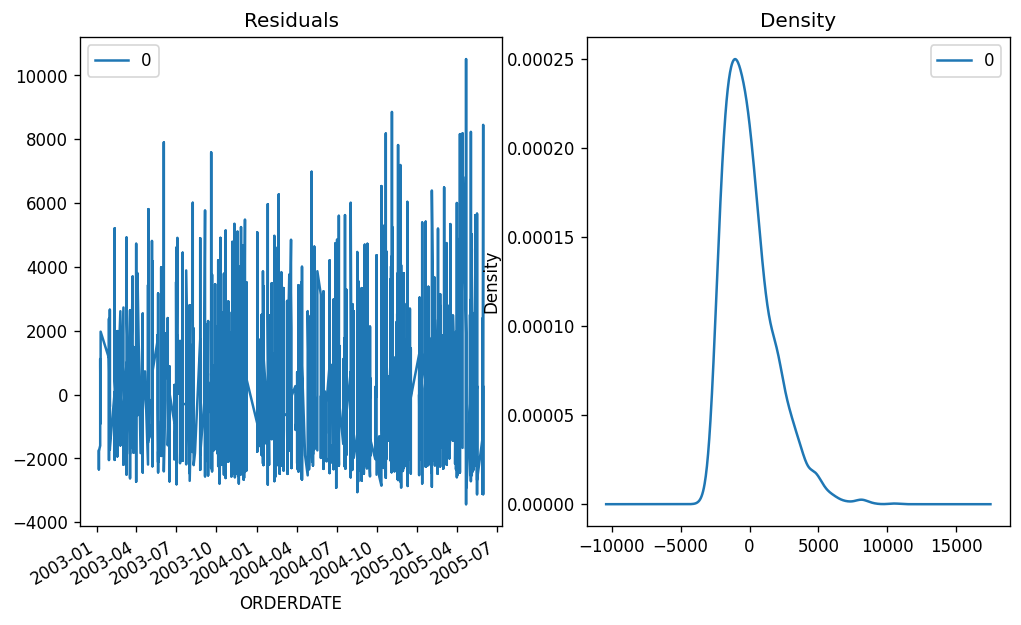

In [ ]:
# Plot the residual errors

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuals", ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting ARIMA model


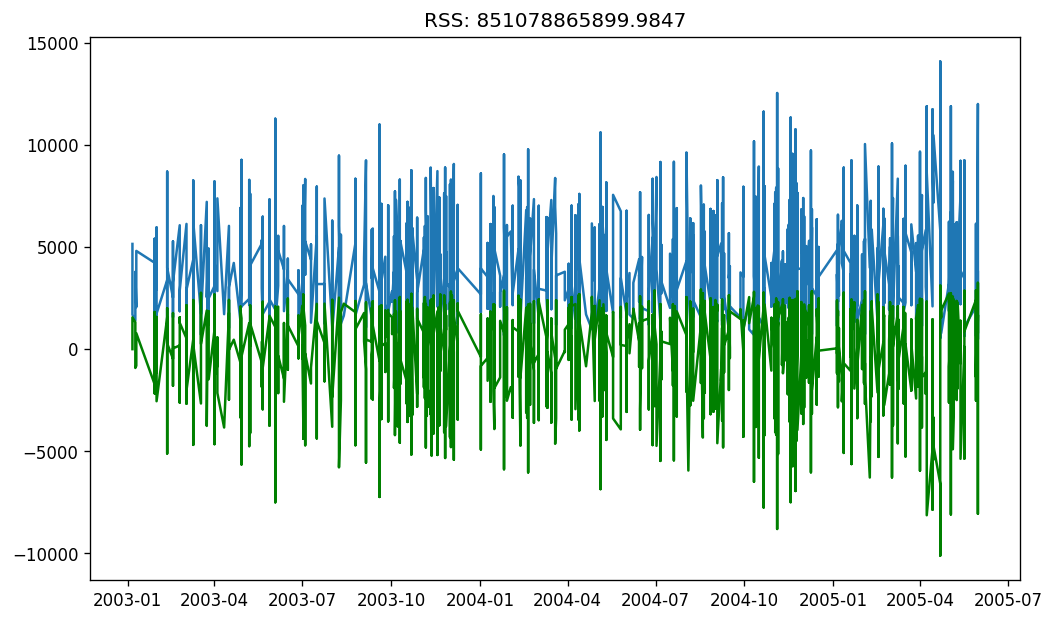

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(forcast.SALES, order=(2,1,2))
model_fit = model.fit(disp = 0)
plt.plot(forcast["SALES"])
plt.plot(model_fit.fittedvalues, color ='green')
plt.title('RSS: %.4f'%sum((model_fit.fittedvalues - forcast.SALES)**2))
print('Plotting ARIMA model')

# https://www.kaggle.com/micky123/arima-sarimax-varma-varmax-ses-hwes

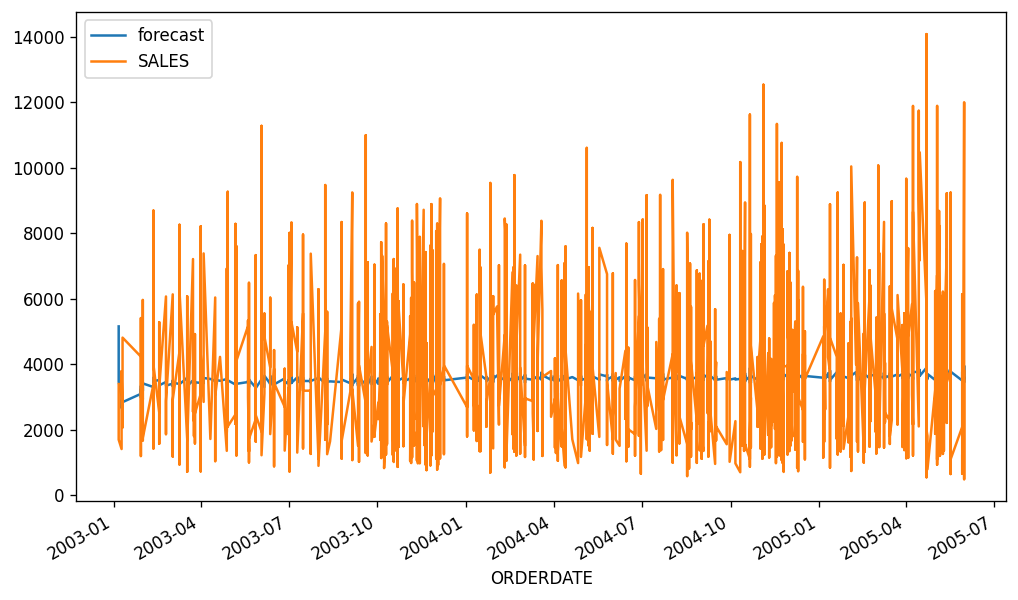

In [ ]:
model_fit.plot_predict(dynamic = False)
plt.show()

Prediction and reverse transformation

In [ ]:
pred_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy = True)
pred_ARIMA_diff.head()

ORDERDATE
2003-01-06       0.081527
2003-01-06     856.776381
2003-01-06    1553.912558
2003-01-09    1315.414193
2003-01-09    1289.641829
dtype: float64

In [ ]:
# convert to cumulative sum

pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum()
pred_ARIMA_diff_cumsum.head()

ORDERDATE
2003-01-06       0.081527
2003-01-06     856.857908
2003-01-06    2410.770466
2003-01-09    3726.184659
2003-01-09    5015.826488
dtype: float64

In [ ]:
pred_ARIMA_log = pd.Series(forcast["SALES"].iloc[0], index = forcast.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff_cumsum, fill_value = 0)
pred_ARIMA_log.head()

ORDERDATE
2003-01-06    5151.081527
2003-01-06    6007.857908
2003-01-06    7561.770466
2003-01-06    5151.081527
2003-01-06    6007.857908
dtype: float64

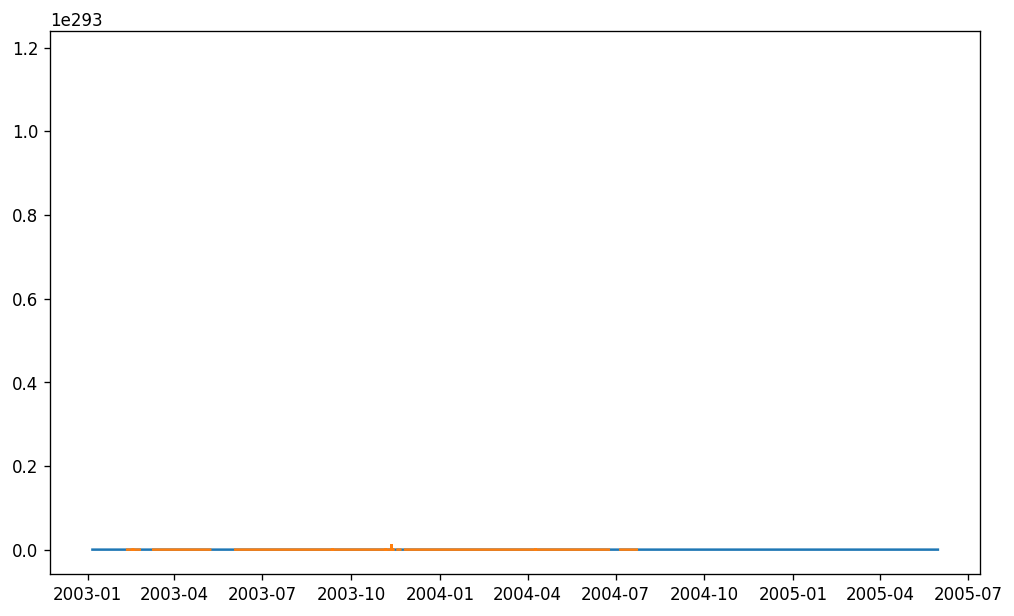

In [ ]:
pred_ARIMA = np.exp(pred_ARIMA_log)
plt.plot(forcast.SALES)
plt.plot(pred_ARIMA)

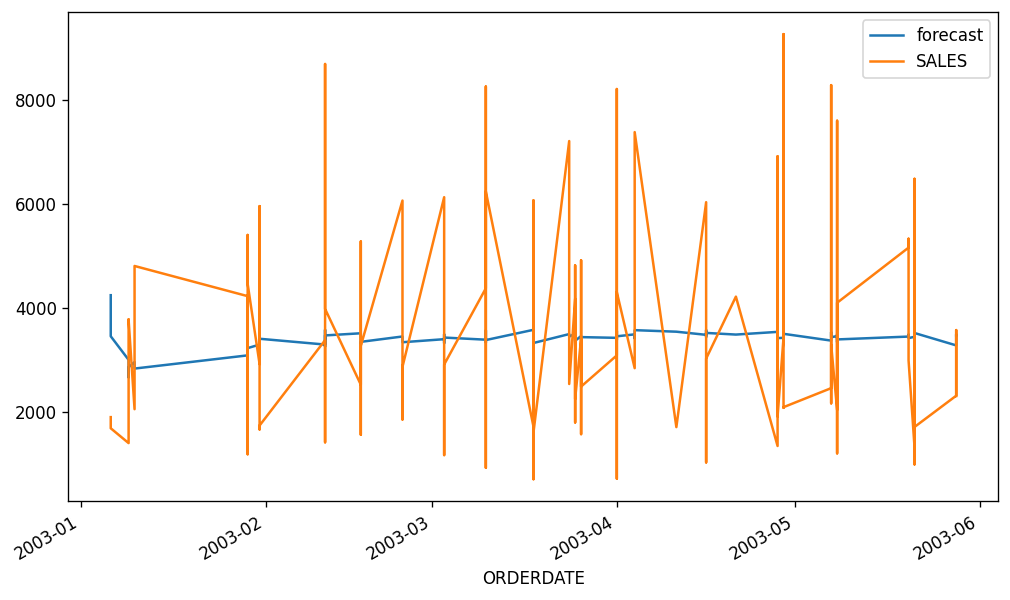

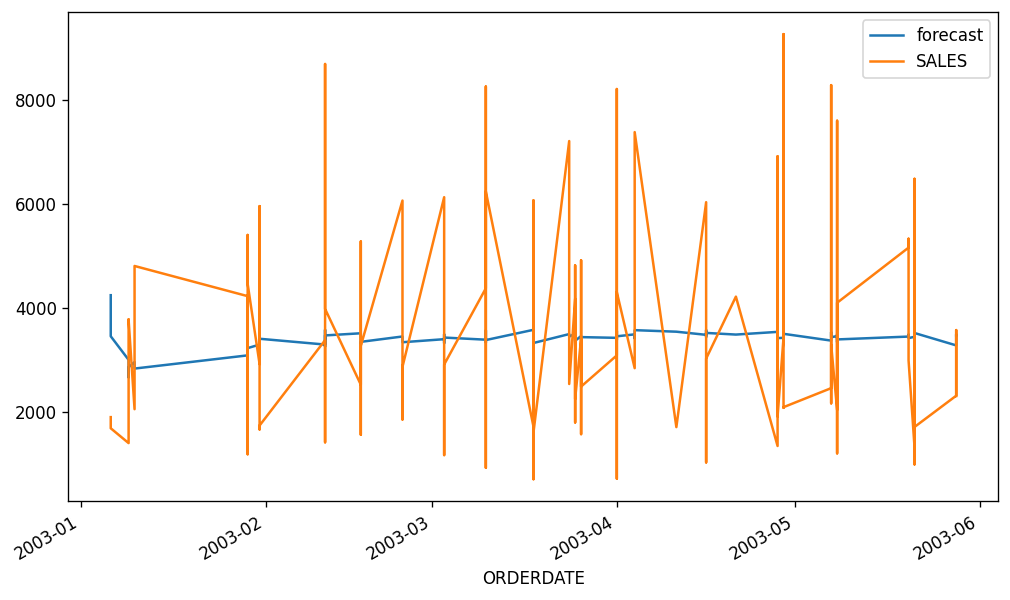

In [ ]:
model_fit.plot_predict(2,234)

## Find the optimal ARIMA model using Out-of-Time Cross validation

In Out-of-Time cross-validation, we move backwards in time and forecast into the future to as many steps we took back. Then we compare the forecast against the actuals.

To do so, we will create the training and testing dataset by splitting the time series into 2 contiguous parts in a reasonable proportion based on time frequency of series

In [ ]:
from statsmodels.tsa.stattools import acf
# Create Training and Test
train = data.SALES[:2258]
test = data.SALES[565:]

In [ ]:
train.head()

0    2871.00
1    2765.90
2    3884.34
3    3746.70
4    5205.27
Name: SALES, dtype: float64

In [ ]:
# Build Model
model = ARIMA(train, order=(2,1,0))  
 
fitted = model.fit(disp=-1)  

print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.SALES   No. Observations:                 2257
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -20012.271
Method:                       css-mle   S.D. of innovations           1715.947
Date:                Sun, 23 Jan 2022   AIC                          40032.543
Time:                        15:35:09   BIC                          40055.430
Sample:                             1   HQIC                         40040.895
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5671     18.836     -0.030      0.976     -37.486      36.352
ar.L1.D.SALES    -0.6097      0.020    -30.457      0.000      -0.649      -0.570
ar.L2.D.SALES    -0.3083      0.020    -

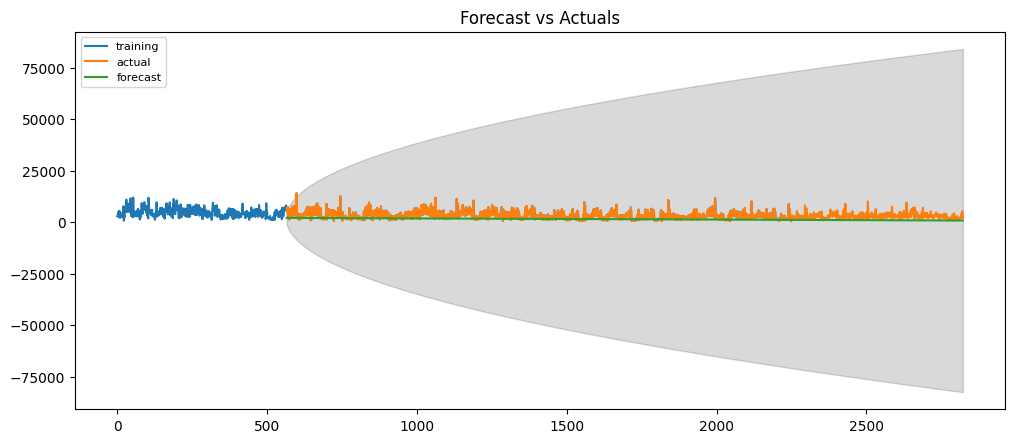

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(2258, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index = test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# https://www.kaggle.com/prashant111/arima-model-for-time-series-forecasting

From the above chart, the ARIMA(1,1,1) model seems to predict a correct forecast. The actual observed values lie within the 95% confidence band.

But, we can see that the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve.

So, in this case, we should increase the order of differencing to two (d=2) and iteratively increase p and q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

                             ARIMA Model Results                              
Dep. Variable:                D.SALES   No. Observations:                 2257
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -19889.821
Method:                       css-mle   S.D. of innovations           1625.141
Date:                Sun, 23 Jan 2022   AIC                          39791.642
Time:                        15:37:05   BIC                          39825.972
Sample:                             1   HQIC                         39804.170
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.6261      7.201     -0.087      0.931     -14.739      13.487
ar.L1.D.SALES    -0.8286      0.063    -13.221      0.000      -0.951      -0.706
ar.L2.D.SALES     0.0101      0.030     

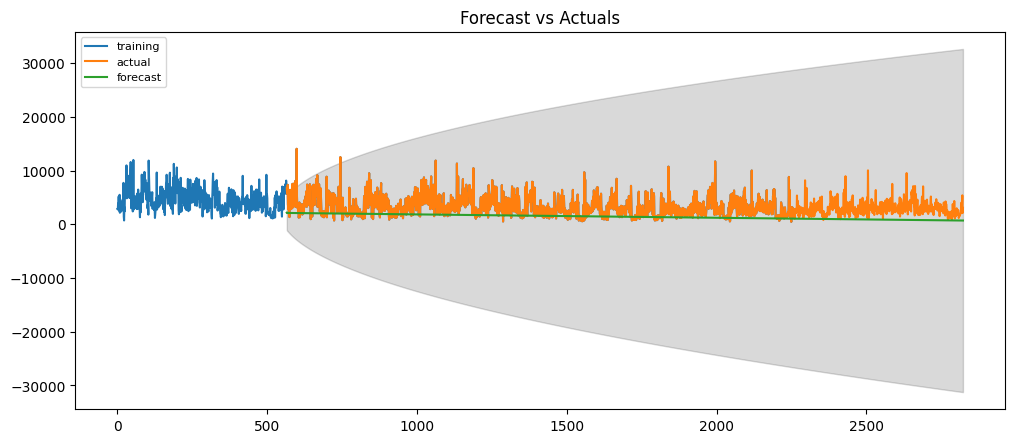

In [ ]:
# Build Model
model = ARIMA(train, order=(2,1,2))  
 
fitted = model.fit(disp=-1) 

print(fitted.summary())

fc, se, conf = fitted.forecast(2258, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index = test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Accuracy Metrics for Time Series Forecast

In [ ]:
# Accuracy metrics
def forcast_accuracy(data, actual):
  mape = np.mean(np.abs(data - actual)/np.abs(actual))  # MAPE
  me = np.mean(data  - actual)             # ME
  mae = np.mean(np.abs(data - actual))    # MAE
  mpe = np.mean((data  - actual)/actual)   # MPE
  rmse = np.mean((data  - actual)**2)**.5  # RMSE
  corr = np.corrcoef(data , actual)[0,1]   # corr
  mins = np.amin(np.hstack([data [:,None],                             
                            actual[:,None]]), axis=1)
  maxs = np.amax(np.hstack([data [:,None],                             
                            actual[:,None]]), axis=1)
  minmax = 1 - np.mean(mins/maxs)             # minmax
  acf1 = acf(fc-test)[1]                      # ACF1
  return({'mape':mape, 'me':me, 'mae': mae,         
          'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
          'corr':corr, 'minmax':minmax})

forcast_accuracy(fc, test.values)


{'acf1': 0.35962894124226596,
 'corr': 0.2109621484141181,
 'mae': 1929.331152970274,
 'mape': 0.5170314167824054,
 'me': -1857.3371874346642,
 'minmax': 0.5043662943454081,
 'mpe': -0.44862736925497787,
 'rmse': 2478.60119411878}

Auto Arima Forcast 


In [ ]:
!pip install pmdarima

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(data.SALES, start_p = 1, start_q = 1, 
                      test = 'adf', 
                      max_p = 3, max_q = 3, 
                      m = 1, 
                      d = None, 
                      seasonal = False,

                      D = 0, 
                      trace = True,
                      error_action = 'ignore', 
                      suppress_warnings = True,
                      stepwise = True)

print(model.summary())

# https://www.kaggle.com/prashant111/arima-model-for-time-series-forecasting

     |████████████████████████████████| 1.4 MB 9.0 MB/s 
     |████████████████████████████████| 9.8 MB 38.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=49502.499, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=54845.303, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=50639.215, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=52991.770, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=49502.333, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=50037.104, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=49516.919, Time=0.96 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=49497.888, Time=0.99 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=49504.057, Time=0.62 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=49499.278, Time=2.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=49499.675, Time=1.30 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=49504.864, Time=0.71 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=49501.304, Time=1.77 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=49485.427, Time=3.32 sec
 ARIMA(1,0,2)(0,0,0

Interpret the residual plots in ARIMA model

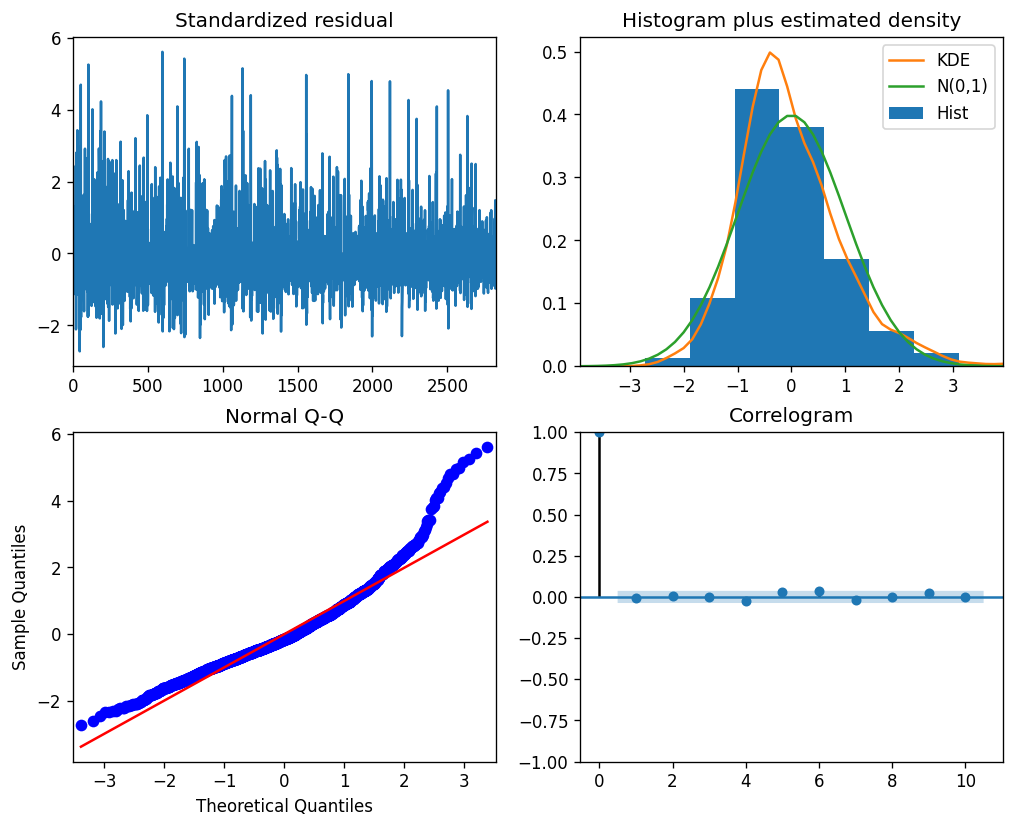

In [ ]:
model.plot_diagnostics(figsize = (10, 8))
plt.show()

Interpretation of plots in plot diagnostics
Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.

Theoretical Quantiles: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

Overall, the model seems to be a good fit. So, let's use it to forecast.



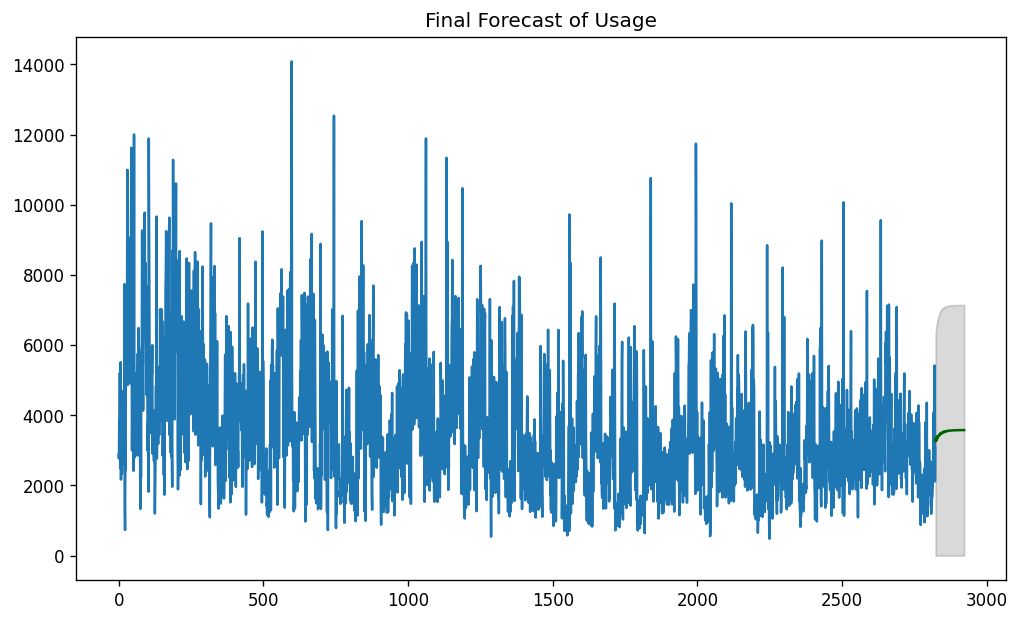

In [ ]:
# Forecast for 100 months

n_periods = 100
fc, confint = model.predict(n_periods = n_periods, return_conf_int = True)
index_of_fc = np.arange(len(data.SALES), len(data.SALES) + n_periods)

# series for plotting purpose

fc_series = pd.Series(fc, index = index_of_fc)
lower_series = pd.Series(confint[:, 0], index = index_of_fc)
upper_series = pd.Series(confint[:, 1], index = index_of_fc)

# plot
plt.plot(data.SALES)
plt.plot(fc_series, color = 'darkgreen')
plt.fill_between(lower_series.index, 
                 upper_series, 
                 color = 'k', 
                 alpha = .15)

plt.title("Final Forecast of Usage")
plt.show()

SARIMA model 

The plain ARIMA model has a problem. It does not support seasonality.
If the time series has defined seasonality, then we should go for Seasonal ARIMA model (in short SARIMA) which uses seasonal differencing.
Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from previous season.
So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.
We should set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. We should try to keep only either SAR or SMA terms if the model has seasonal components.
Now, we will build a SARIMA model on the time series dataset.

But, first import the dataset

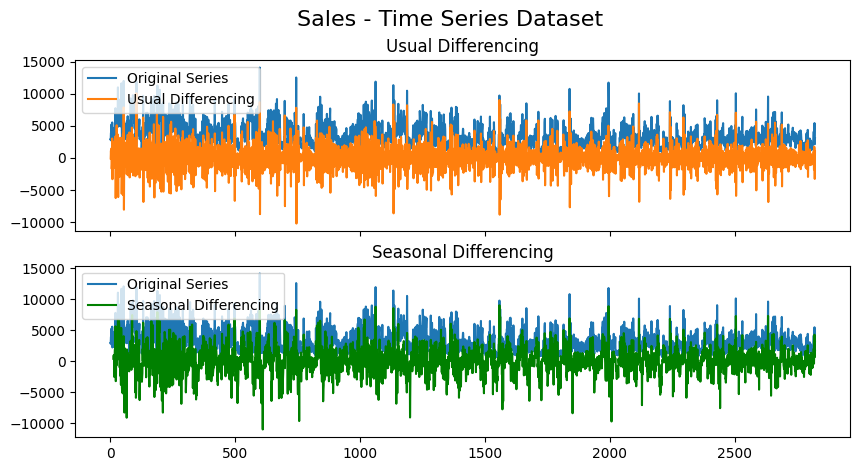

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data.SALES[:], label='Original Series')
axes[0].plot(data.SALES[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data.SALES[:], label='Original Series')
axes[1].plot(data.SALES[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Sales - Time Series Dataset', fontsize=16)
plt.show()

# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [ ]:
model = pm.auto_arima(data.SALES, start_p = 1, start_q = 1, 
                      test = 'adf', 
                      max_p = 3, max_q = 3, 
                      m = 12, 
                      d = None, 
                      seasonal = True,
                      D = 1, 
                      trace = True,
                      error_action = 'ignore', 
                      suppress_warnings = True,
                      stepwise = True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=51.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=51374.294, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=50620.768, Time=4.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=33.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=51372.326, Time=0.17 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=51192.525, Time=0.41 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=50283.099, Time=32.41 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=73.02 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=28.84 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=50691.368, Time=9.13 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=50145.050, Time=41.68 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=50420.427, Time=18.25 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=90.55 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=39.00 sec
 ARIMA(3,0,0)(2,1,0)[12] interce

In [ ]:

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.SALES.index[-1], periods = 10, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


In [ ]:
#  Plot
data[['ORDERDATE','SALES']].plot('ORDERDATE', figsize=(15,8))
#plt.figure(figsize=(12,5), dpi=100)
plt.plot(data.SALES)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Sales")
plt.show()


ValueError: ignored

SARIMAX model with exogeneous variables
Now, we will force an external predictor, also called, exogenous variable into the model. This model is called the SARIMAX model. The only requirement to use an exogenous variable is we should know the value of the variable during the forecast period as well.

I want to see how the model looks if we force the recent seasonality pattern into the training and forecast. The seasonal index is a good exogenous variable because it repeats every frequency cycle, 12 months in this case.

So, we will always know what values the seasonal index will hold for the future forecasts.

Let’s compute the seasonal index so that it can be forced as a (exogenous) predictor to the SARIMAX model.

In [ ]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
import datetime

data.reset_index(inplace=True)
data.ORDERDATE = pd.to_datetime(data.ORDERDATE)
data.set_index('ORDERDATE', inplace = True, drop = True)
result_mul = seasonal_decompose(data.SALES, model = 'additive', extrapolate_trend='freq')

AttributeError: ignored

In [ ]:
# The exogenous variable (seasonal index) is ready. Let’s build the SARIMAX model.

# SARIMAX Model
sxmodel = pm.auto_arima(df[['SALES']], exogenous=df[['seasonal_index']],                    
                        start_p=1, start_q=1,
                        test='adf',
                        max_p=3, max_q=3, m=12,
                        seasonal=True,
                        d=None, D=1, trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

sxmodel.summary()

KeyError: ignored

In [ ]:
# Forecast
n_periods = 100
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.value, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], period = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data.SALES)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of Sales")
plt.show

LSTM Model 


In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
#represent month in date field as its first day
# Represent month in date field a ots forst day

df.ORDERDATE = pd.to_datetime(df.ORDERDATE, errors='coerce')
df.ORDERDATE = df.ORDERDATE.dt.year.astype('str') + '-' + df.ORDERDATE.dt.month.astype('str')  + '-01'


# groupby date and sum the sales

df = df.groupby('ORDERDATE').SALES.sum().reset_index()
df.head()

,ORDERDATE,SALES
0,2003-1-01,129753.60
1,2003-10-01,568290.97
2,2003-11-01,1029837.66
3,2003-12-01,261876.46
4,2003-2-01,140836.19


In [ ]:
# create a new dataframe to model the difference

data_diff = df.copy()

# add previous sales to the nex row
data_diff['prev_sales']= data_diff.SALES.shift(1)

# drop the null values and calculate the difference

data_diff = data_diff.dropna()
data_diff['diff'] = (data_diff.SALES - data_diff.prev_sales)

data_diff.head()

,ORDERDATE,SALES,prev_sales,diff
1,2003-10-01,568290.97,129753.60,438537.37
2,2003-11-01,1029837.66,568290.97,461546.69
3,2003-12-01,261876.46,1029837.66,-767961.20
4,2003-2-01,140836.19,261876.46,-121040.27
5,2003-3-01,174504.90,140836.19,33668.71


In [ ]:
# plot sales diff 

plot_data = [go.Scatter(x = data_diff['ORDERDATE'], y = data_diff['diff'])]
plot_layout = go.Layout(title = 'Monthly Sales Difference')
figure = go.Figure(data = plot_data, layout = plot_layout )
pyoff.iplot(figure)

In [ ]:
# Create dataframe for transformation form series to supervised 
data_supervised = data_diff.drop(['prev_sales'], axis = 1)

# adding lags
for inc in range(1, 17):
  field_name = 'lag_' + str(inc)
  data_supervised[field_name] = data_supervised['diff'].shift(inc)

  # drop na value
data_supervised = data_supervised.dropna().reset_index(drop = True)
data_supervised.head()

,ORDERDATE,SALES,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16
0,2004-3-01,205733.73,-105685.80,-61383.13,-716245.35,536123.76,236346.83,52604.06,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65,33668.71,-121040.27,-767961.20,461546.69,438537.37
1,2004-4-01,206148.12,414.39,-105685.80,-61383.13,-716245.35,536123.76,236346.83,52604.06,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65,33668.71,-121040.27,-767961.20,461546.69
2,2004-5-01,273438.39,67290.27,414.39,-105685.80,-61383.13,-716245.35,536123.76,236346.83,52604.06,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65,33668.71,-121040.27,-767961.20
3,2004-6-01,286674.22,13235.83,67290.27,414.39,-105685.80,-61383.13,-716245.35,536123.76,236346.83,52604.06,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65,33668.71,-121040.27
4,2004-7-01,327144.09,40469.87,13235.83,67290.27,414.39,-105685.80,-61383.13,-716245.35,536123.76,236346.83,52604.06,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65,33668.71


In [ ]:
import statsmodels.formula.api as smf

# define the regression formula
model= smf.ols(formula = 'diff ~ lag_1', data = data_supervised)

# fit the regression
model_fit = model.fit()

# extract the adusted r-squared
reg_adj_rsq = model_fit.rsquared_adj
print(reg_adj_rsq*100)

3.1579923986381653


In [ ]:
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6', data=data_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
reg_adj_rsq = model_fit.rsquared_adj
print(reg_adj_rsq*100)

-22.958938675585937


In [ ]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6 + lag_7 + lag_9 + lag_10 + lag_11 + lag_12 + lag_14 + lag_15 + lag_16', data=data_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
reg_adj_rsq = model_fit.rsquared_adj
print(reg_adj_rsq*100)

nan


In [ ]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_model = data_supervised.drop(['SALES','ORDERDATE'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values
print(df_model.head(10))

        diff      lag_1      lag_2  ...     lag_14     lag_15     lag_16
0 -105685.80  -61383.13 -716245.35  ... -767961.20  461546.69  438537.37
1     414.39 -105685.80  -61383.13  ... -121040.27 -767961.20  461546.69
2   67290.27     414.39 -105685.80  ...   33668.71 -121040.27 -767961.20
3   13235.83   67290.27     414.39  ...   27104.65   33668.71 -121040.27
4   40469.87   13235.83   67290.27  ...   -8936.44   27104.65   33668.71
5  134357.18   40469.87   13235.83  ...  -24590.55   -8936.44   27104.65
6 -140750.36  134357.18   40469.87  ...   19649.32  -24590.55   -8936.44
7   18792.51 -140750.36  134357.18  ...   10077.42   19649.32  -24590.55
8   18642.76   18792.51 -140750.36  ...   66164.06   10077.42   19649.32
9   16076.58   18642.76   18792.51  ...   52604.06   66164.06   10077.42

[10 rows x 17 columns]


In [ ]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
print(train_set)
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

[[-1.0568580e+05 -6.1383130e+04 -7.1624535e+05  5.3612376e+05
   2.3634683e+05  5.2604060e+04  6.6164060e+04  1.0077420e+04
   1.9649320e+04 -2.4590550e+04 -8.9364400e+03  2.7104650e+04
   3.3668710e+04 -1.2104027e+05 -7.6796120e+05  4.6154669e+05
   4.3853737e+05]
 [ 4.1439000e+02 -1.0568580e+05 -6.1383130e+04 -7.1624535e+05
   5.3612376e+05  2.3634683e+05  5.2604060e+04  6.6164060e+04
   1.0077420e+04  1.9649320e+04 -2.4590550e+04 -8.9364400e+03
   2.7104650e+04  3.3668710e+04 -1.2104027e+05 -7.6796120e+05
   4.6154669e+05]
 [ 6.7290270e+04  4.1439000e+02 -1.0568580e+05 -6.1383130e+04
  -7.1624535e+05  5.3612376e+05  2.3634683e+05  5.2604060e+04
   6.6164060e+04  1.0077420e+04  1.9649320e+04 -2.4590550e+04
  -8.9364400e+03  2.7104650e+04  3.3668710e+04 -1.2104027e+05
  -7.6796120e+05]
 [ 1.3235830e+04  6.7290270e+04  4.1439000e+02 -1.0568580e+05
  -6.1383130e+04 -7.1624535e+05  5.3612376e+05  2.3634683e+05
   5.2604060e+04  6.6164060e+04  1.0077420e+04  1.9649320e+04
  -2.4590550e+04

In [ ]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train)

[[[-0.48775955 -1.          1.          0.52126425  0.22783196
    0.24948692  0.15991805 -0.96360815 -1.         -0.65502336
    0.13923028  1.         -1.         -1.          1.
    0.9625715 ]]

 [[-1.          0.67155699 -1.          1.          0.52126425
    0.22783196  0.24948692 -1.         -0.66091581 -1.
   -0.65502336  0.77466037  1.          0.61401395 -1.
    1.        ]]

 [[ 0.22676148  0.55847299  0.04579746 -1.          1.
    0.52126425  0.22783196 -0.7867616  -0.73428131 -0.02506616
   -1.         -0.46260526  0.91514313  1.          0.05232498
   -1.        ]]

 [[ 1.          0.82929715 -0.02495272  0.04579746 -1.
    1.          0.52126425 -0.83831599 -0.30439548 -0.23600641
   -0.02506616 -1.          0.44922202  0.98362322  0.30398498
    0.05232498]]

 [[ 0.37500673  1.          0.14448645 -0.02495272  0.04579746
   -1.          1.         -0.13973583 -0.40832847  1.
   -0.23600641  0.51872406  0.24685354  0.89370369  0.29330744
    0.30398498]]

 [[ 0.6898946

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(LSTM(5, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy'])
# model.fit(X_train, y_train, 
#                   epoch=100, 
#                   batch_size=10, 
#                   verbose=1, 
#                   shuffle=False)

In [ ]:
y_pred = model.predict(X_test,batch_size=1)
#for multistep prediction, you need to replace X_test values with the predictions coming from t-1
#print(y_pred)
print(y_test)

[[-1.29215235]
 [ 0.03713352]
 [ 0.03588582]
 [ 0.01450482]
 [-1.05785356]
 [ 1.51549593]]


In [ ]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0]))
print(trainScore*100)
print(history.history['accuracy'])

101.62745190216071
[0.0]


In [ ]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])

In [ ]:
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):

  #print np.concatenate([y_pred[index],X_test[index]],axis=1)
  pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
  #reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

In [ ]:
#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(df[-7:].ORDERDATE)
act_sales = list(df[-7:].SALES)
for index in range(0,len(pred_test_set_inverted)):
  result_dict = {}
  result_dict['pred_sales'] = int(pred_test_set_inverted[index][0] + act_sales[index])
  result_dict['ORDERDATE'] = sales_dates[index+1]
  result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales

In [ ]:
#merge with actual sales dataframe
df_sales_pred = pd.merge(df,df_result,on='ORDERDATE',how='left')
#plot actual and predicted
plot_data = [
    go.Scatter(
        x=df_sales_pred['ORDERDATE'],
        y=df_sales_pred['SALES'],
        name='actual'
    ),
        go.Scatter(
        x=df_sales_pred['ORDERDATE'],
        y=df_sales_pred['pred_sales'],
        name='predicted'
    )
    
]
plot_layout = go.Layout(
        title='Sales Prediction'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)